<a href="https://colab.research.google.com/github/kairamilanifitria/NLP-Projects/blob/main/Project%202%20Text%20Summarization/0_EDA_dev%2Btest_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

# Load the dataset
test_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/fine-tune_dataset/dev_df.csv')
dev_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/fine-tune_dataset/test_df.csv')

In [32]:
# Basic overview
print(dev_df.shape)
print(dev_df.info())
print(dev_df.isnull().sum())

(9775, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9775 entries, 0 to 9774
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   9775 non-null   int64 
 1   url                  9775 non-null   object
 2   text                 9775 non-null   object
 3   abstractive_summary  9775 non-null   object
 4   extractive_summary   9775 non-null   object
dtypes: int64(1), object(4)
memory usage: 382.0+ KB
None
id                     0
url                    0
text                   0
abstractive_summary    0
extractive_summary     0
dtype: int64


In [33]:
# Basic overview
print(test_df.shape)
print(test_df.info())
print(test_df.isnull().sum())

(9540, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   9540 non-null   int64 
 1   url                  9540 non-null   object
 2   text                 9540 non-null   object
 3   abstractive_summary  9540 non-null   object
 4   extractive_summary   9540 non-null   object
dtypes: int64(1), object(4)
memory usage: 372.8+ KB
None
id                     0
url                    0
text                   0
abstractive_summary    0
extractive_summary     0
dtype: int64


In [34]:
dev_df.describe()


,id
count,9775.000000
mean,19812.523376
std,3888.550440
min,13019.000000
25%,16434.500000
50%,19884.000000
75%,23240.500000
max,26403.000000


In [35]:
test_df.describe()

,id
count,9540.000000
mean,6542.906813
std,3718.870775
min,1.000000
25%,3277.750000
50%,6584.500000
75%,9756.250000
max,13018.000000


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Text Length Analysis

In [37]:
# Function to calculate word and sentence count
def word_sentence_count(text):
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    return len(words), len(sentences)

# Apply the function to the text and summary columns
dev_df['text_word_count'], dev_df['text_sentence_count'] = zip(*dev_df['text'].apply(word_sentence_count))
dev_df['a-summary_word_count'], dev_df['a-summary_sentence_count'] = zip(*dev_df['abstractive_summary'].apply(word_sentence_count))
dev_df['e-summary_word_count'], dev_df['e-summary_sentence_count'] = zip(*dev_df['extractive_summary'].apply(word_sentence_count))

# Apply the function to the text and summary columns
test_df['text_word_count'], test_df['text_sentence_count'] = zip(*test_df['text'].apply(word_sentence_count))
test_df['a-summary_word_count'], test_df['a-summary_sentence_count'] = zip(*test_df['abstractive_summary'].apply(word_sentence_count))
test_df['e-summary_word_count'], test_df['e-summary_sentence_count'] = zip(*test_df['extractive_summary'].apply(word_sentence_count))


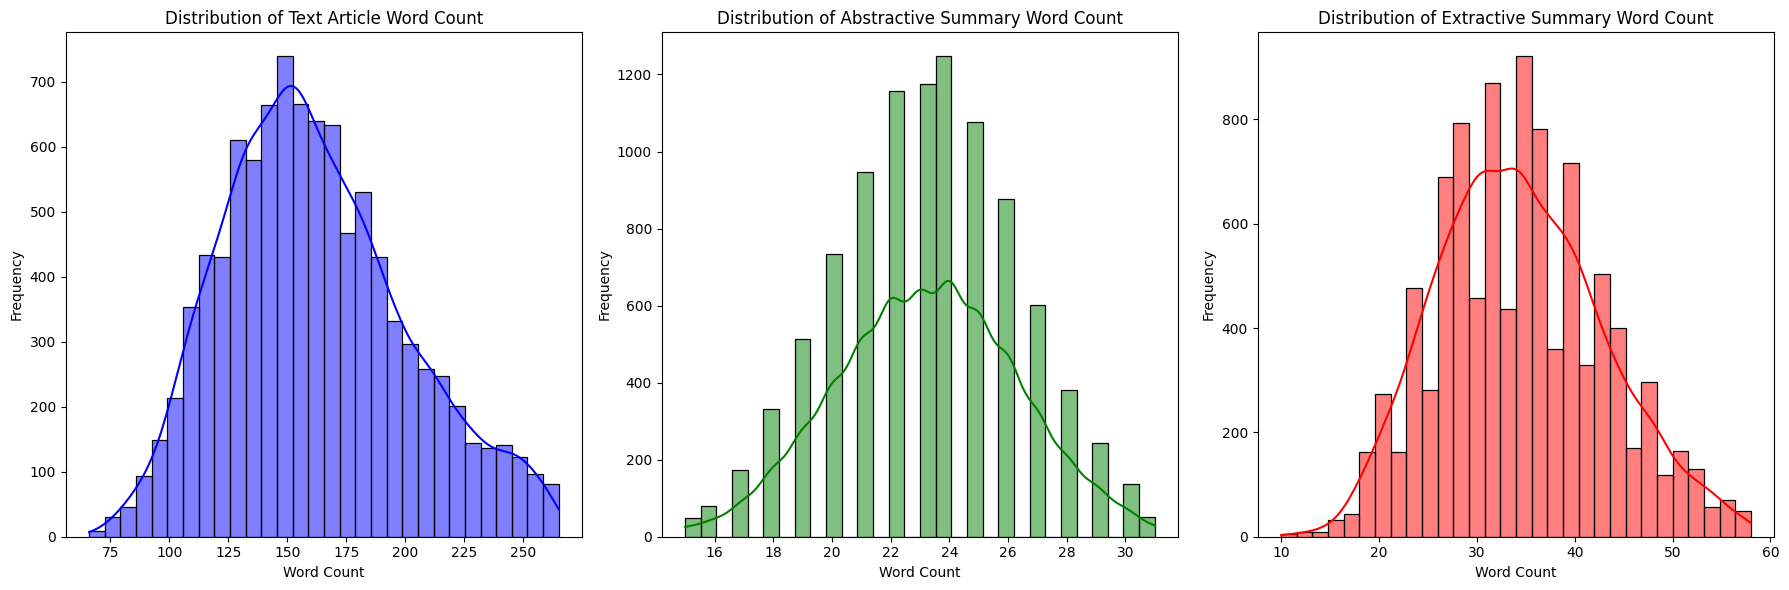

In [38]:
# Histograms for word counts = DEV_DF
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(dev_df['text_word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Article Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(dev_df['a-summary_word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Abstractive Summary Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(dev_df['e-summary_word_count'], bins=30, kde=True, color='red')
plt.title('Distribution of Extractive Summary Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

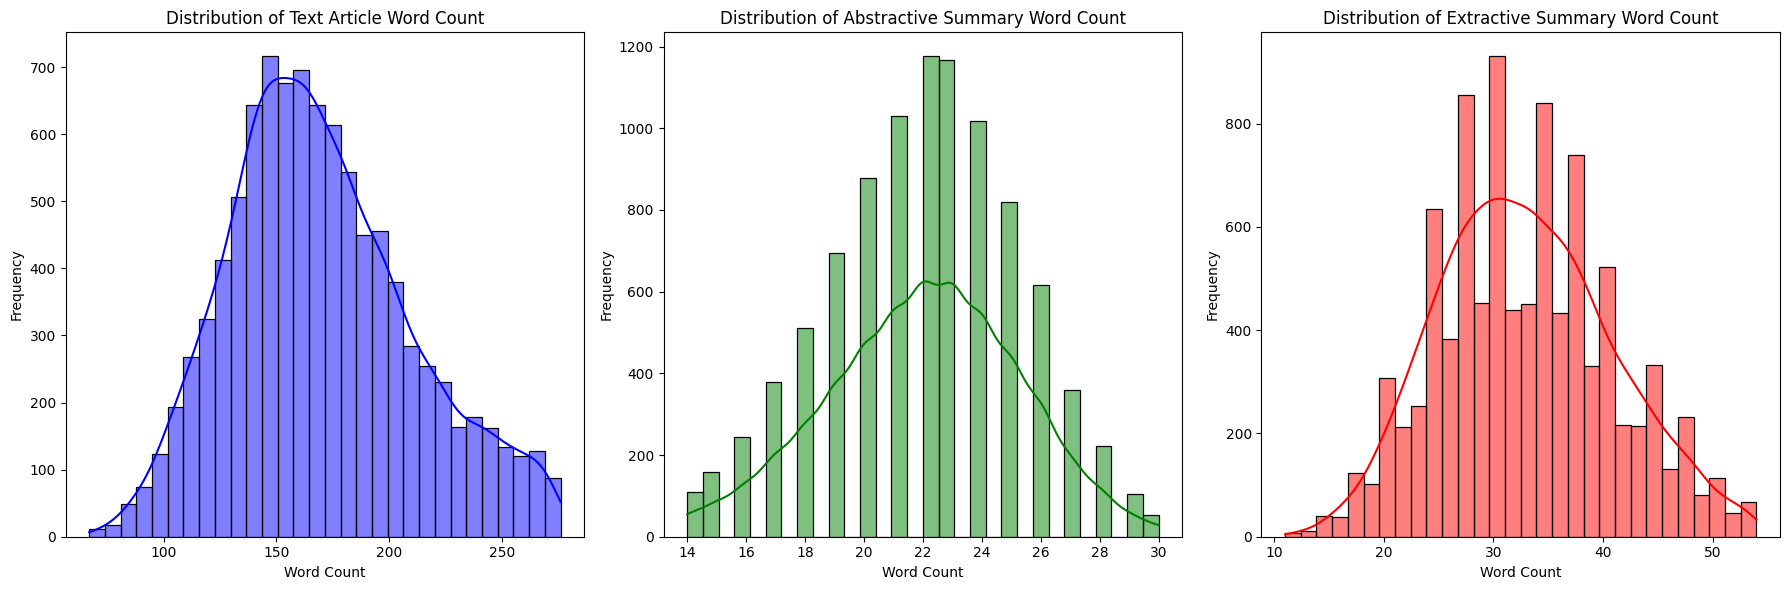

In [39]:
# Histograms for word counts = TEST_DF
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(test_df['text_word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Article Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(test_df['a-summary_word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Abstractive Summary Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(test_df['e-summary_word_count'], bins=30, kde=True, color='red')
plt.title('Distribution of Extractive Summary Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of Extractive Summary Word Count')

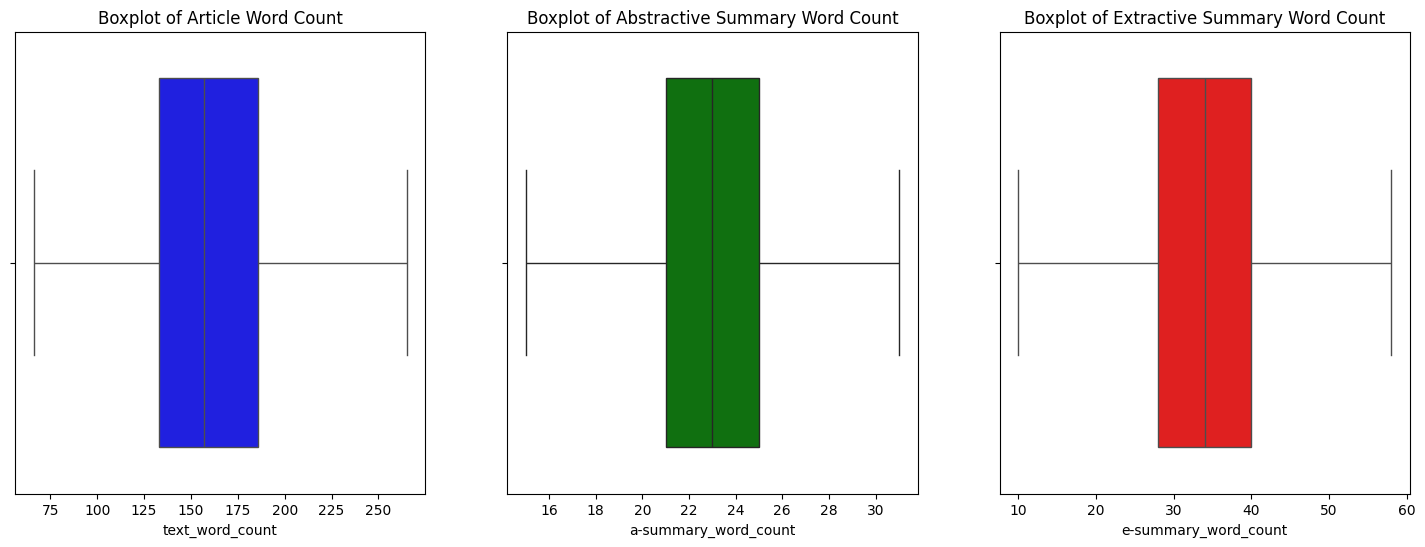

In [40]:
# Boxplots for outlier detection
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=dev_df['text_word_count'], color='blue')
plt.title('Boxplot of Article Word Count')

plt.subplot(1, 3, 2)
sns.boxplot(x=dev_df['a-summary_word_count'], color='green')
plt.title('Boxplot of Abstractive Summary Word Count')

plt.subplot(1, 3, 3)
sns.boxplot(x=dev_df['e-summary_word_count'], color='red')
plt.title('Boxplot of Extractive Summary Word Count')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of Extractive Summary Word Count')

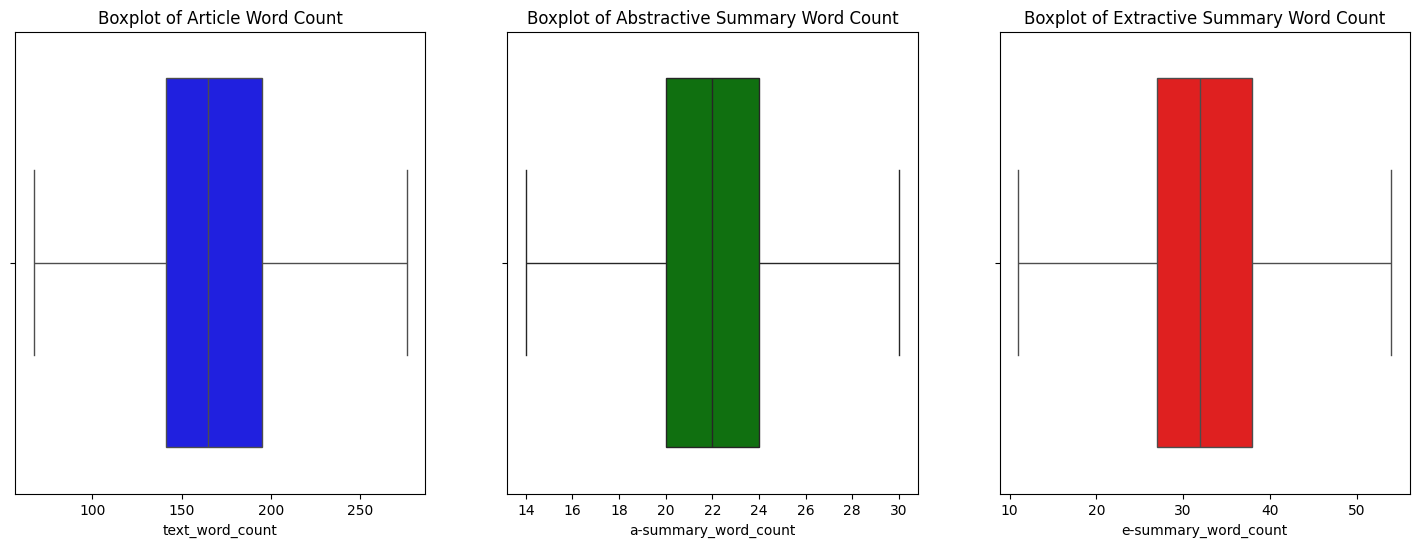

In [41]:
# Boxplots for outlier detection
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=test_df['text_word_count'], color='blue')
plt.title('Boxplot of Article Word Count')

plt.subplot(1, 3, 2)
sns.boxplot(x=test_df['a-summary_word_count'], color='green')
plt.title('Boxplot of Abstractive Summary Word Count')

plt.subplot(1, 3, 3)
sns.boxplot(x=test_df['e-summary_word_count'], color='red')
plt.title('Boxplot of Extractive Summary Word Count')

# Coverage Ratio

**abstractive**

In [44]:
# Function to calculate word overlap coverage between summary and article
def coverage_ratio(summary, article):
    # Tokenize and convert to sets for comparison
    article_words = set(word_tokenize(article.lower()))
    summary_words = set(word_tokenize(summary.lower()))

    # Calculate the ratio of overlapping words
    if len(summary_words) == 0:
        return 0
    overlap = summary_words.intersection(article_words)
    return len(overlap) / len(summary_words)

# Calculate coverage for both summaries
dev_df['abstractive_summary_coverage'] = dev_df.apply(lambda row: coverage_ratio(row['abstractive_summary'], row['text']), axis=1)
dev_df['extractive_summary_coverage'] = dev_df.apply(lambda row: coverage_ratio(row['extractive_summary'], row['text']), axis=1)


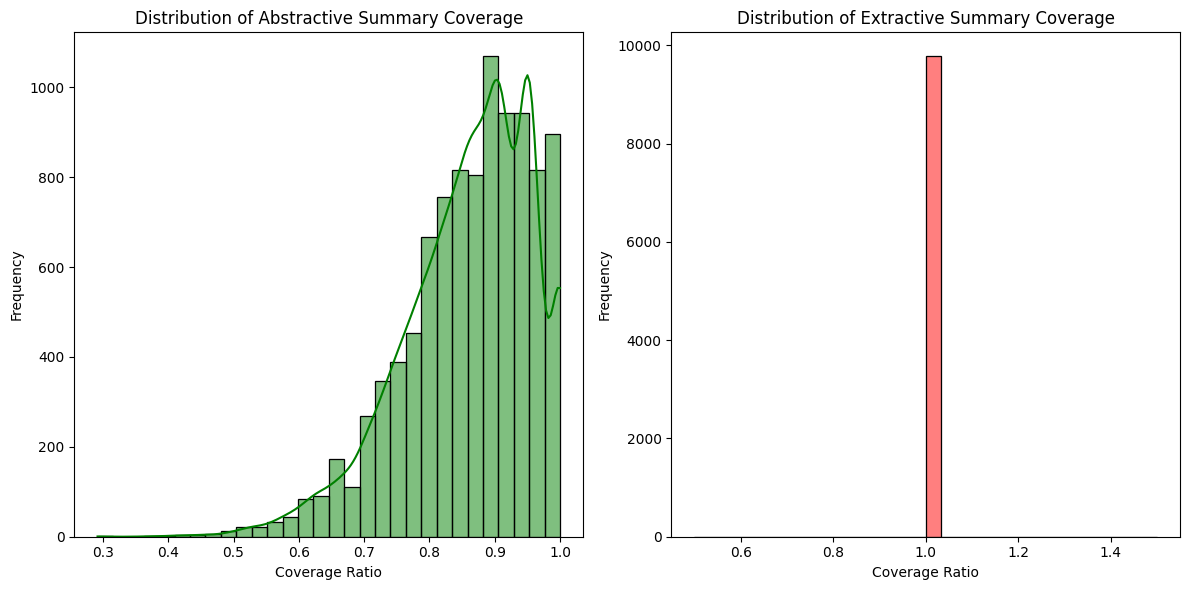

In [45]:
# Histograms for coverage
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dev_df['abstractive_summary_coverage'], bins=30, kde=True, color='green')
plt.title('Distribution of Abstractive Summary Coverage')
plt.xlabel('Coverage Ratio')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(dev_df['extractive_summary_coverage'], bins=30, kde=True, color='red')
plt.title('Distribution of Extractive Summary Coverage')
plt.xlabel('Coverage Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


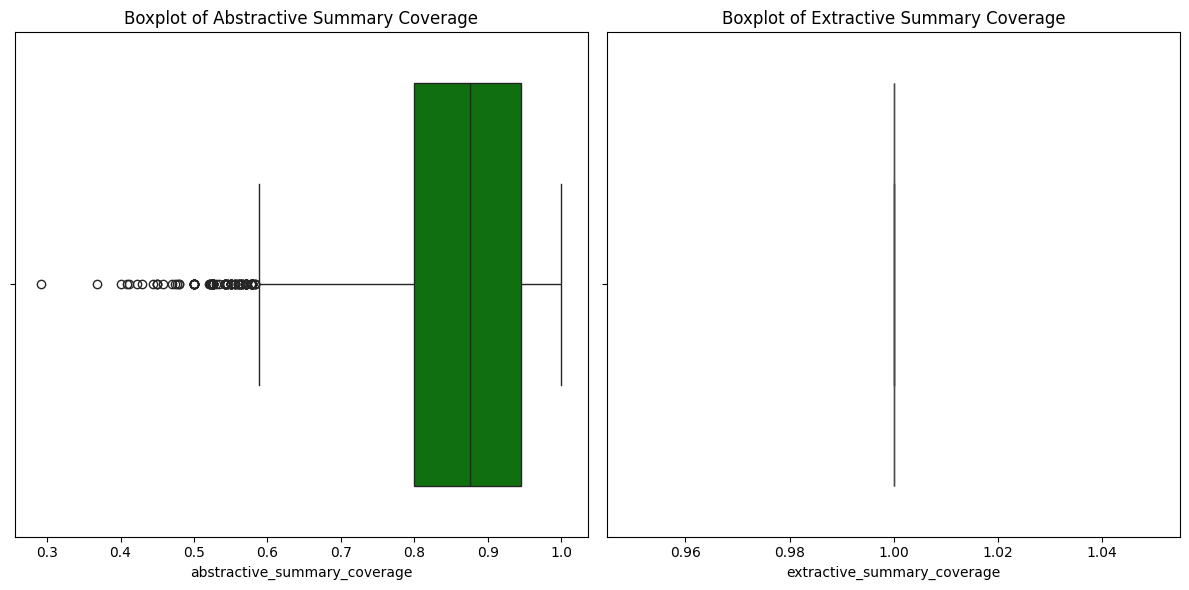

In [48]:
# Boxplots for outlier detection in coverage
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=dev_df['abstractive_summary_coverage'], color='green')
plt.title('Boxplot of Abstractive Summary Coverage')

plt.subplot(1, 2, 2)
sns.boxplot(x=dev_df['extractive_summary_coverage'], color='red')
plt.title('Boxplot of Extractive Summary Coverage')

plt.tight_layout()
plt.show()

**extractive**

In [46]:
# Function to calculate word overlap coverage between summary and article
def coverage_ratio(summary, article):
    # Tokenize and convert to sets for comparison
    article_words = set(word_tokenize(article.lower()))
    summary_words = set(word_tokenize(summary.lower()))

    # Calculate the ratio of overlapping words
    if len(summary_words) == 0:
        return 0
    overlap = summary_words.intersection(article_words)
    return len(overlap) / len(summary_words)

# Calculate coverage for both summaries
test_df['abstractive_summary_coverage'] = test_df.apply(lambda row: coverage_ratio(row['abstractive_summary'], row['text']), axis=1)
test_df['extractive_summary_coverage'] = test_df.apply(lambda row: coverage_ratio(row['extractive_summary'], row['text']), axis=1)


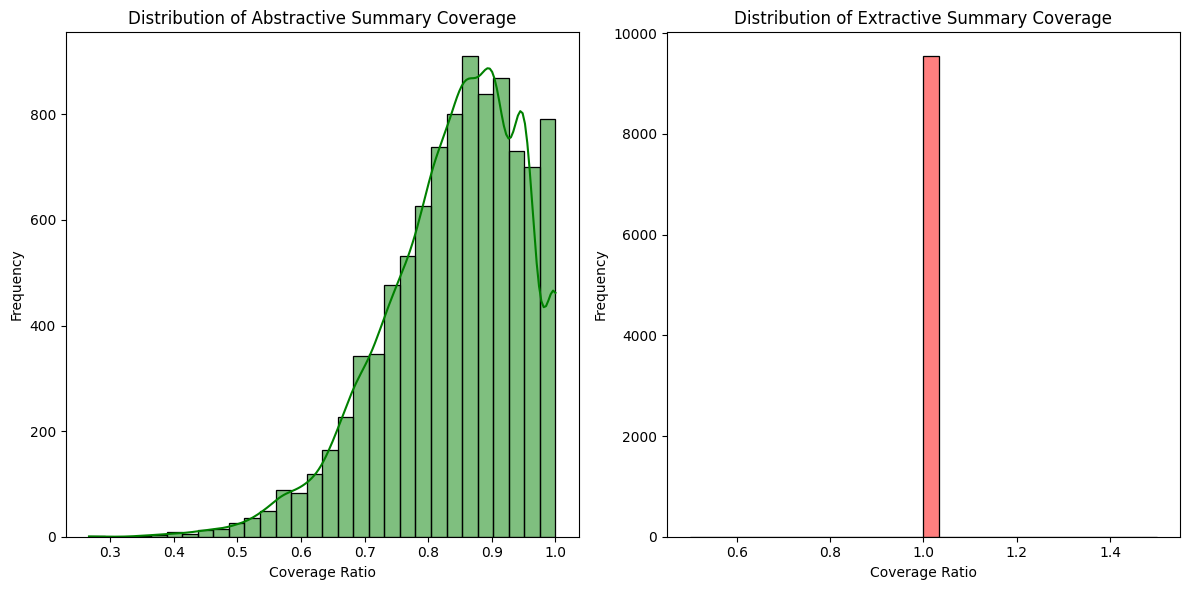

In [47]:
# Histograms for coverage
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(test_df['abstractive_summary_coverage'], bins=30, kde=True, color='green')
plt.title('Distribution of Abstractive Summary Coverage')
plt.xlabel('Coverage Ratio')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_df['extractive_summary_coverage'], bins=30, kde=True, color='red')
plt.title('Distribution of Extractive Summary Coverage')
plt.xlabel('Coverage Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


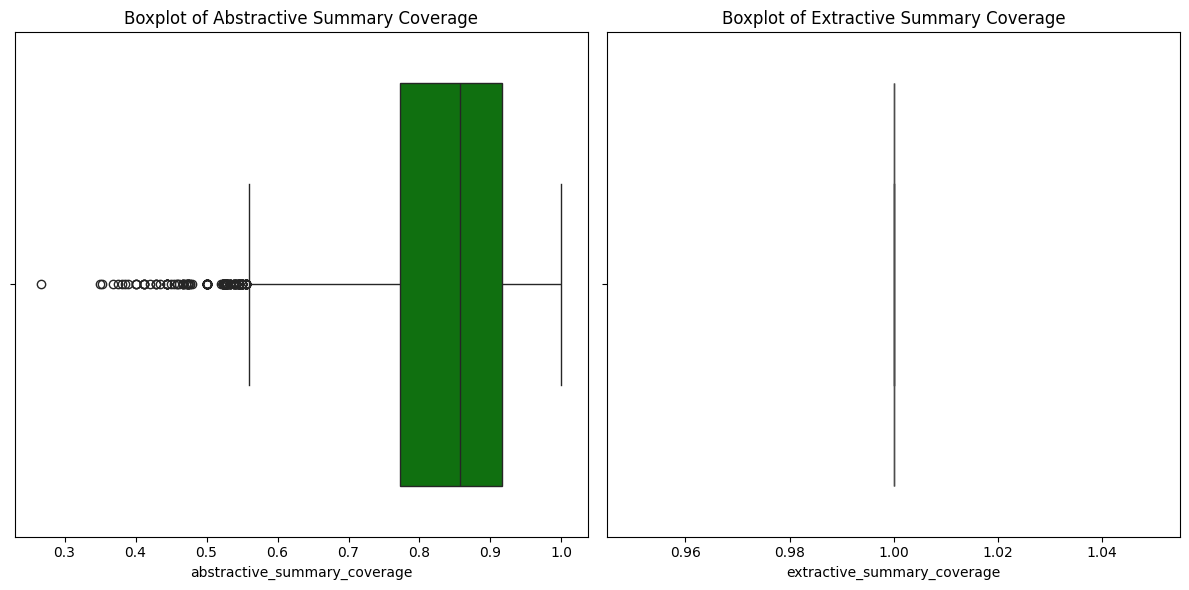

In [49]:
# Boxplots for outlier detection in coverage
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=test_df['abstractive_summary_coverage'], color='green')
plt.title('Boxplot of Abstractive Summary Coverage')

plt.subplot(1, 2, 2)
sns.boxplot(x=test_df['extractive_summary_coverage'], color='red')
plt.title('Boxplot of Extractive Summary Coverage')

plt.tight_layout()
plt.show()

# N-gram + Word Frequency

In [50]:
# Install necessary library
!pip install scikit-learn

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

**dev_df**

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

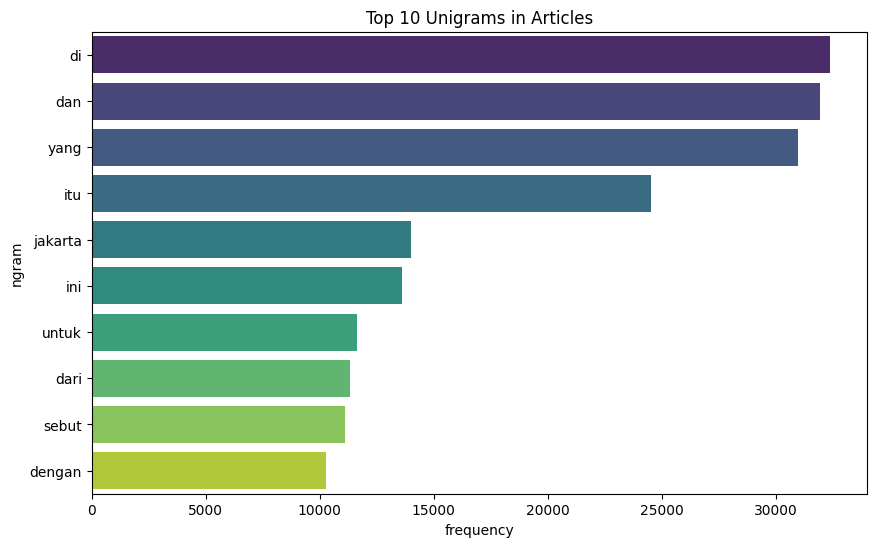

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

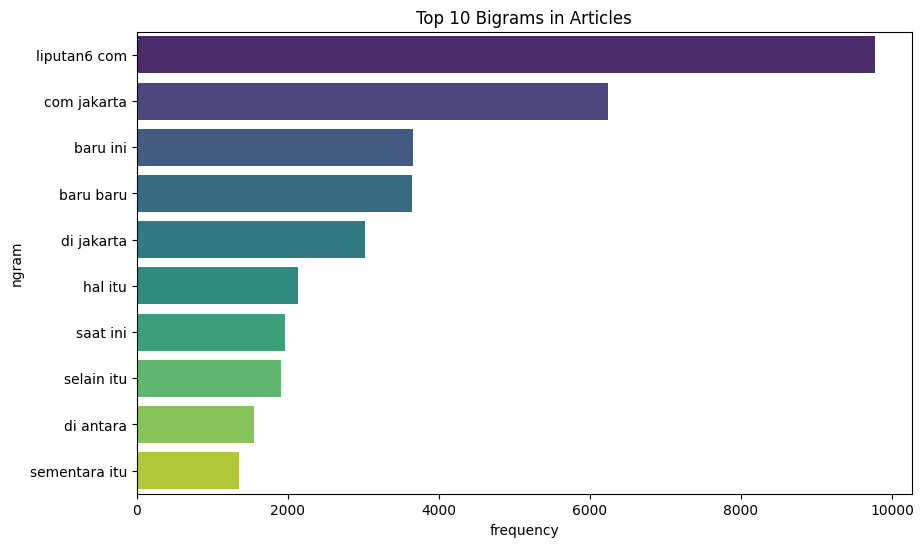

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

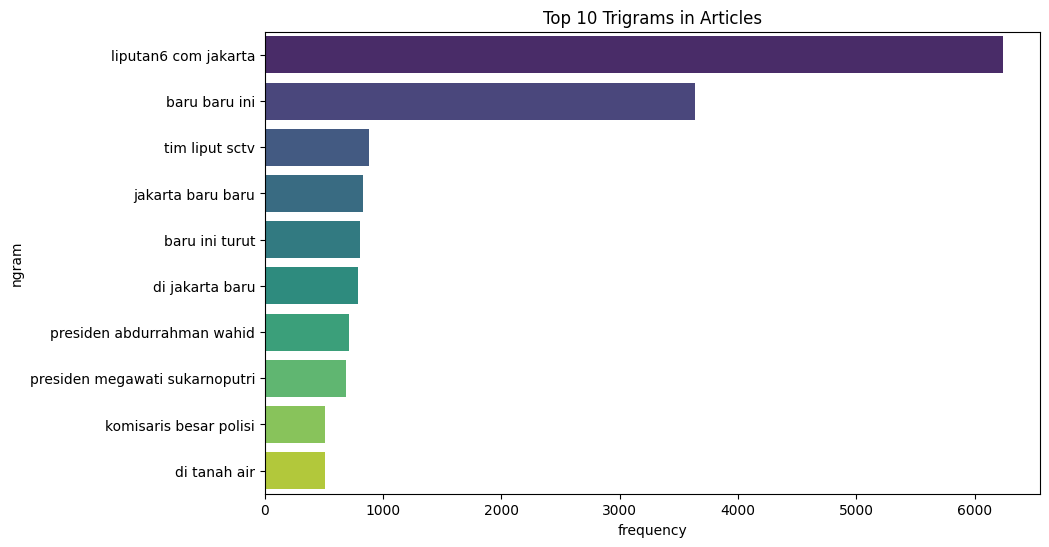

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

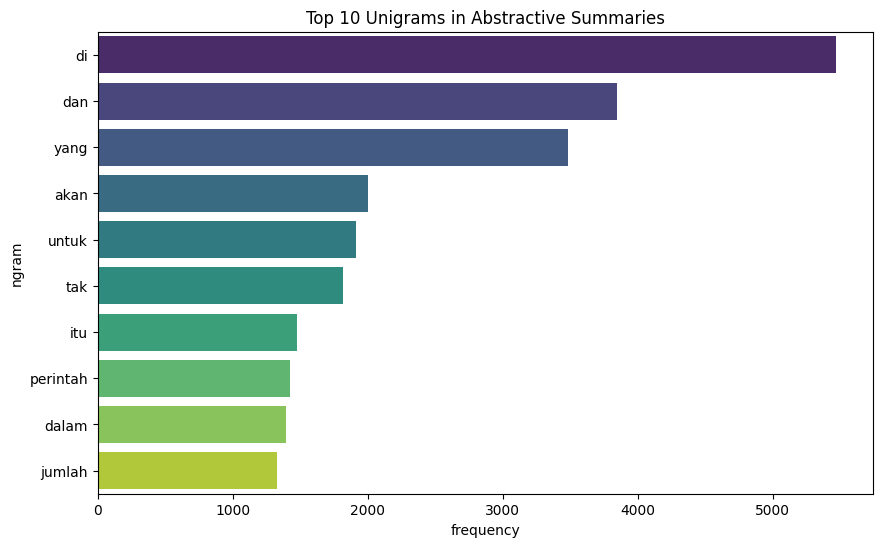

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

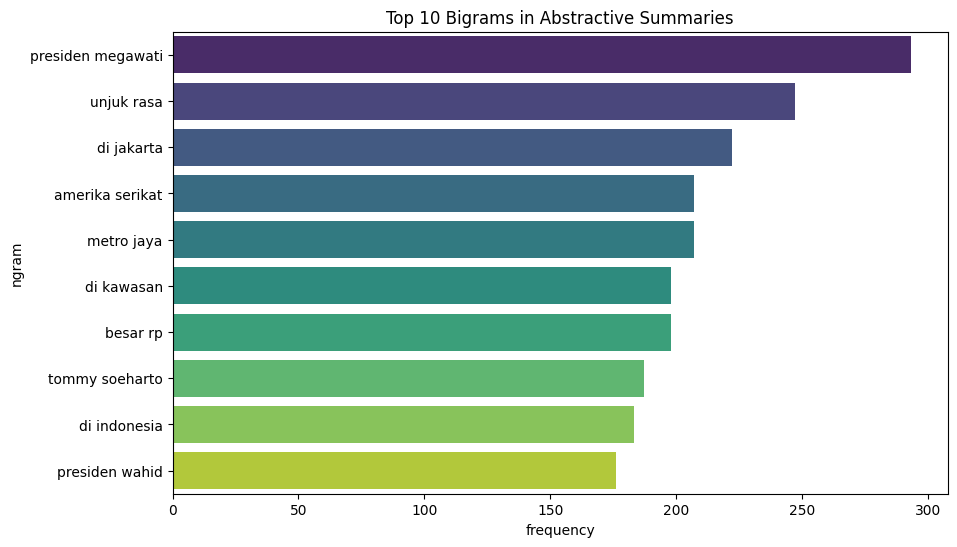

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

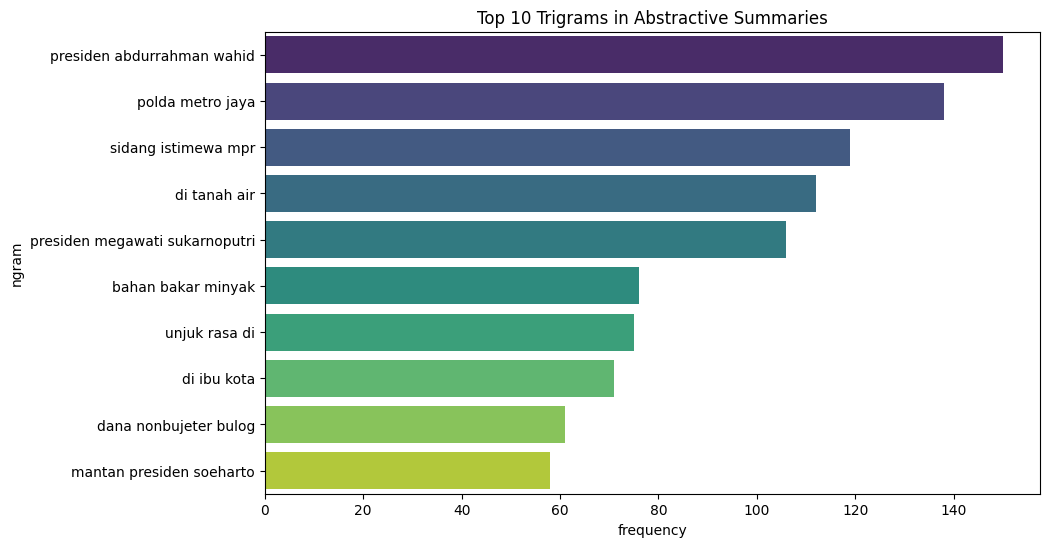

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

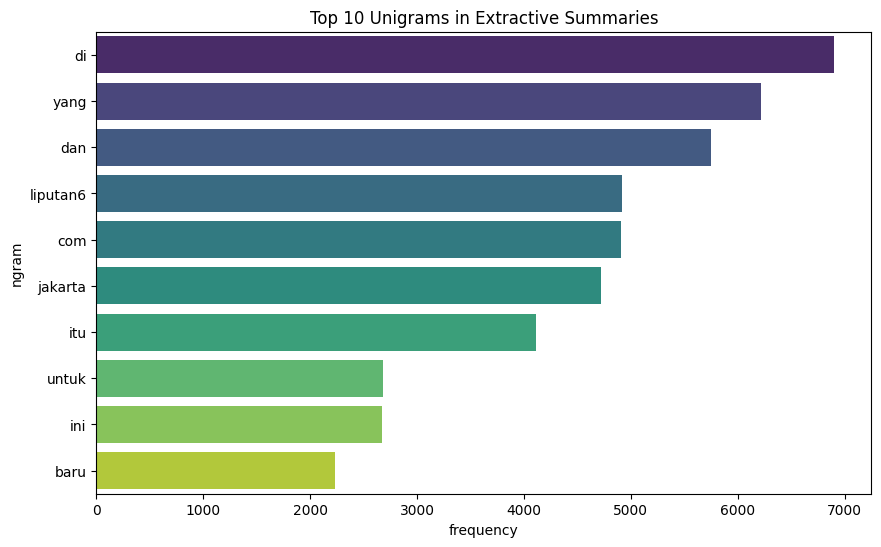

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

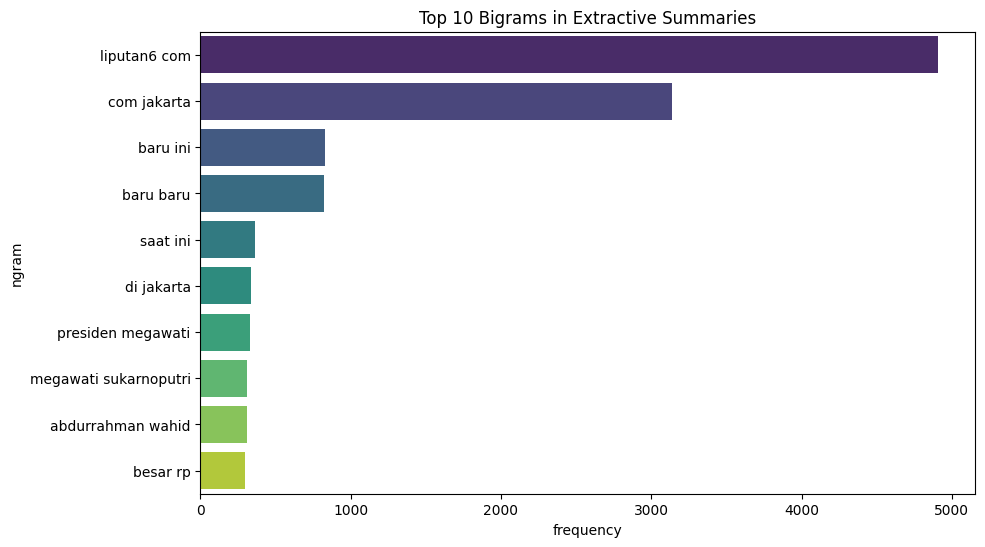

<ipython-input-51-318160f93e8c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

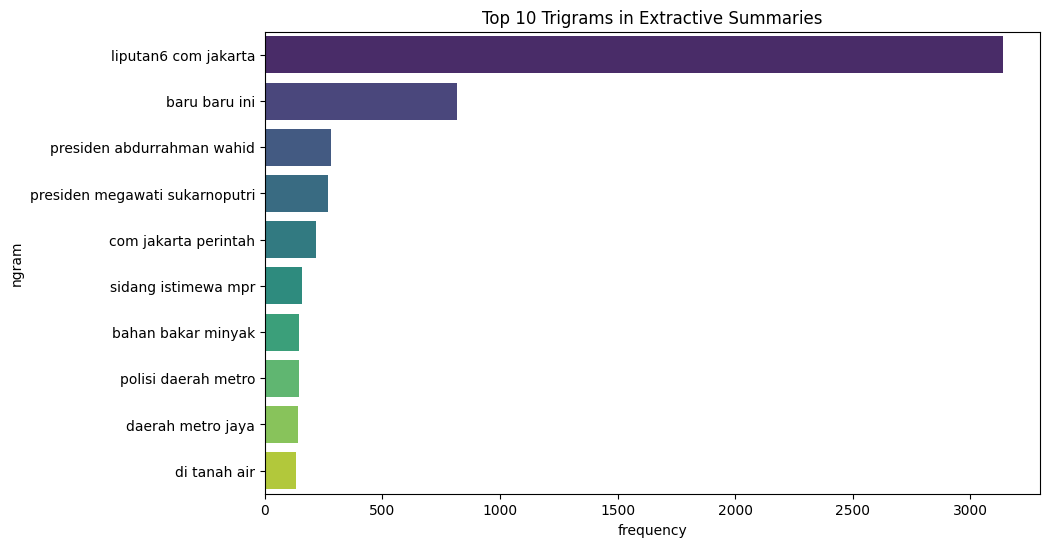

In [51]:
# Function to extract N-grams
def get_ngrams(text, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_vector = vectorizer.fit_transform(text)
    sum_words = ngram_vector.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

# Get unigrams, bigrams, and trigrams for articles, abstractive summaries, and extractive summaries
text_unigrams = get_ngrams(dev_df['text'], n=1)
text_bigrams = get_ngrams(dev_df['text'], n=2)
text_trigrams = get_ngrams(dev_df['text'], n=3)

abstractive_summary_unigrams = get_ngrams(dev_df['abstractive_summary'], n=1)
abstractive_summary_bigrams = get_ngrams(dev_df['abstractive_summary'], n=2)
abstractive_summary_trigrams = get_ngrams(dev_df['abstractive_summary'], n=3)

extractive_summary_unigrams = get_ngrams(dev_df['extractive_summary'], n=1)
extractive_summary_bigrams = get_ngrams(dev_df['extractive_summary'], n=2)
extractive_summary_trigrams = get_ngrams(dev_df['extractive_summary'], n=3)

# Function to visualize top N N-grams
def plot_ngrams(ngrams, title, top_n=10):
    ngrams_df = pd.DataFrame(ngrams, columns=['ngram', 'frequency']).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
    plt.title(title)
    plt.show()

# Visualize top N N-grams for articles, summaries, and extractive summaries
plot_ngrams(text_unigrams, 'Top 10 Unigrams in Articles')
plot_ngrams(text_bigrams, 'Top 10 Bigrams in Articles')
plot_ngrams(text_trigrams, 'Top 10 Trigrams in Articles')

plot_ngrams(abstractive_summary_unigrams, 'Top 10 Unigrams in Abstractive Summaries')
plot_ngrams(abstractive_summary_bigrams, 'Top 10 Bigrams in Abstractive Summaries')
plot_ngrams(abstractive_summary_trigrams, 'Top 10 Trigrams in Abstractive Summaries')

plot_ngrams(extractive_summary_unigrams, 'Top 10 Unigrams in Extractive Summaries')
plot_ngrams(extractive_summary_bigrams, 'Top 10 Bigrams in Extractive Summaries')
plot_ngrams(extractive_summary_trigrams, 'Top 10 Trigrams in Extractive Summaries')


**test_df**

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

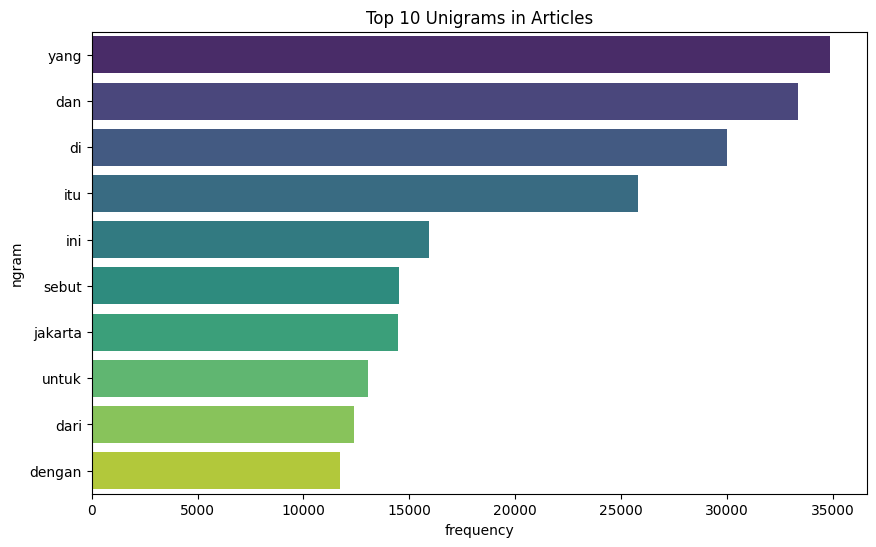

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

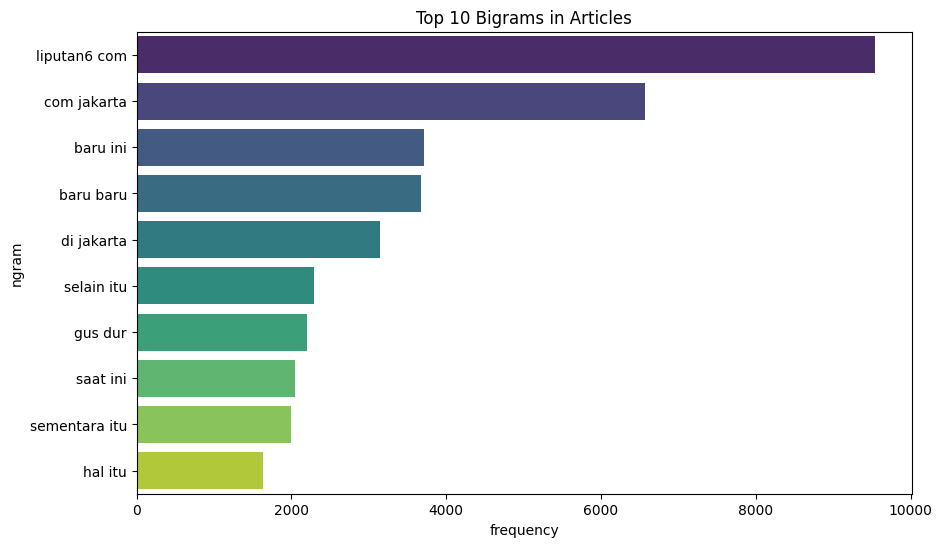

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

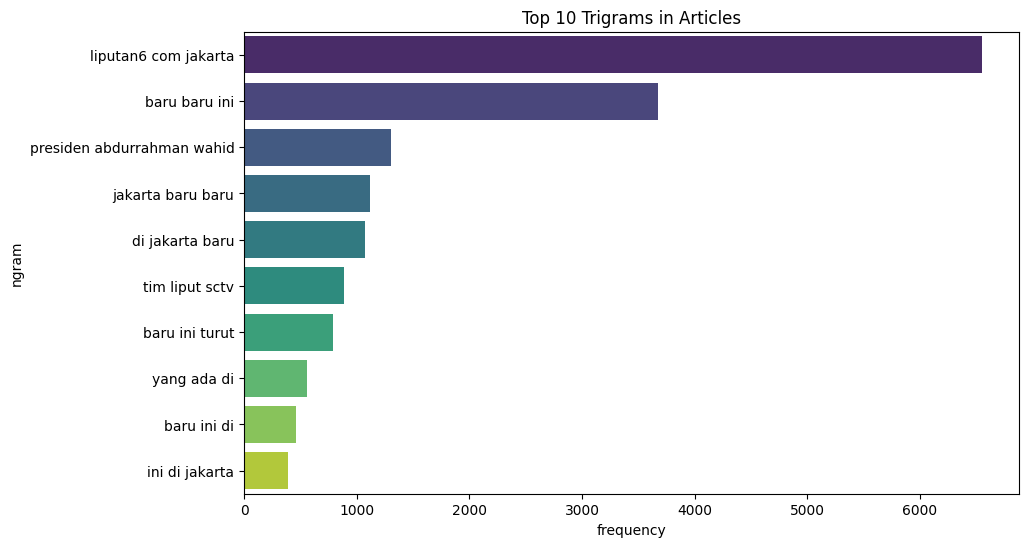

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

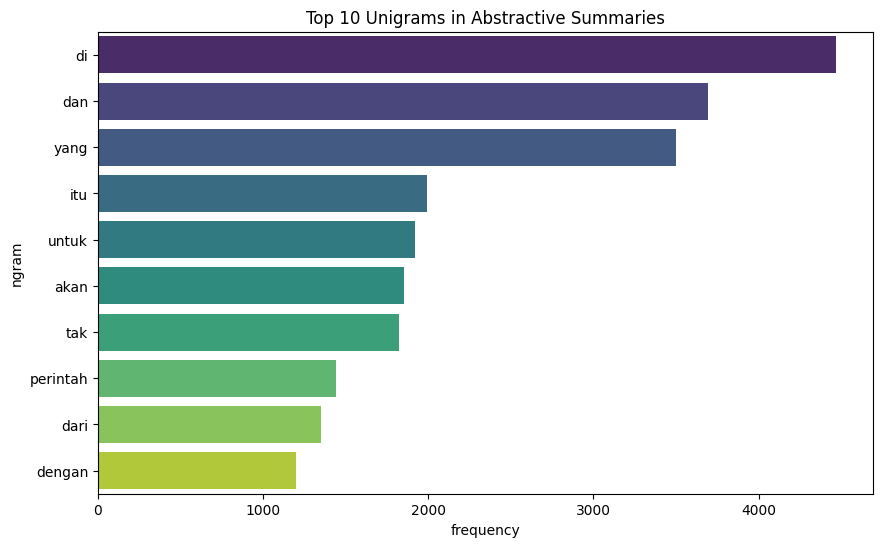

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

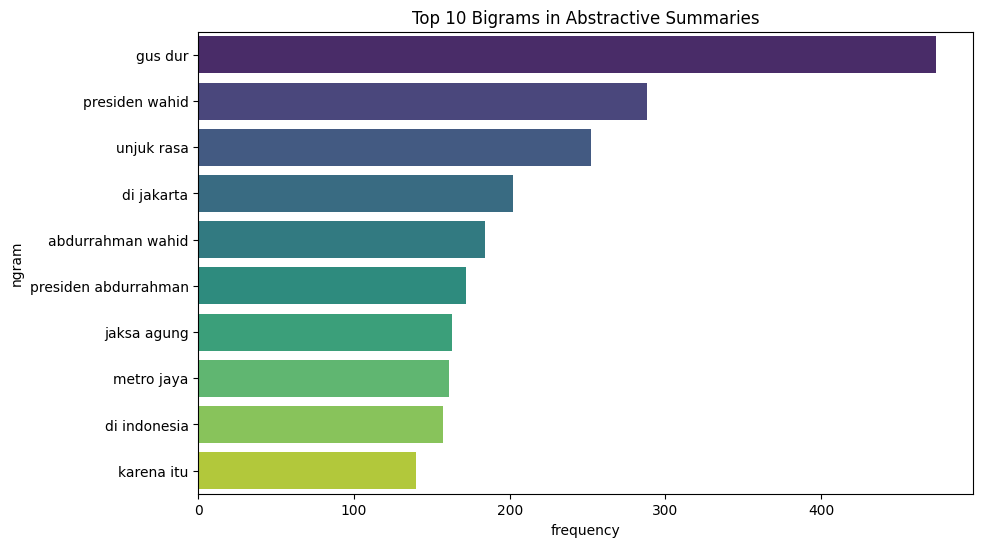

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

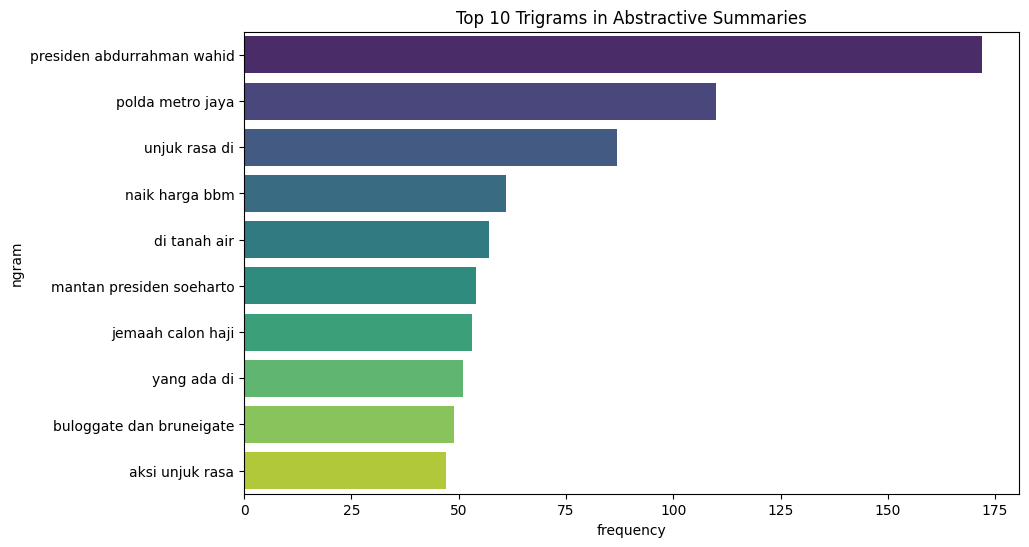

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

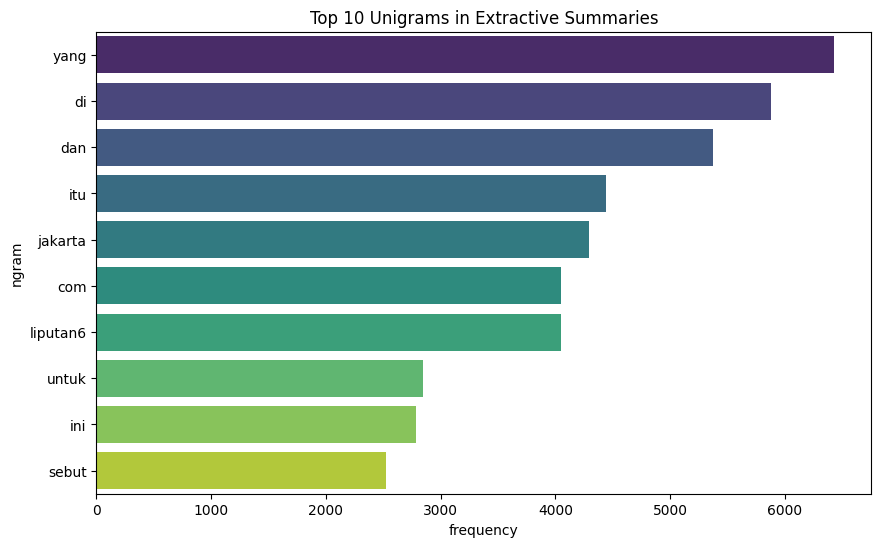

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

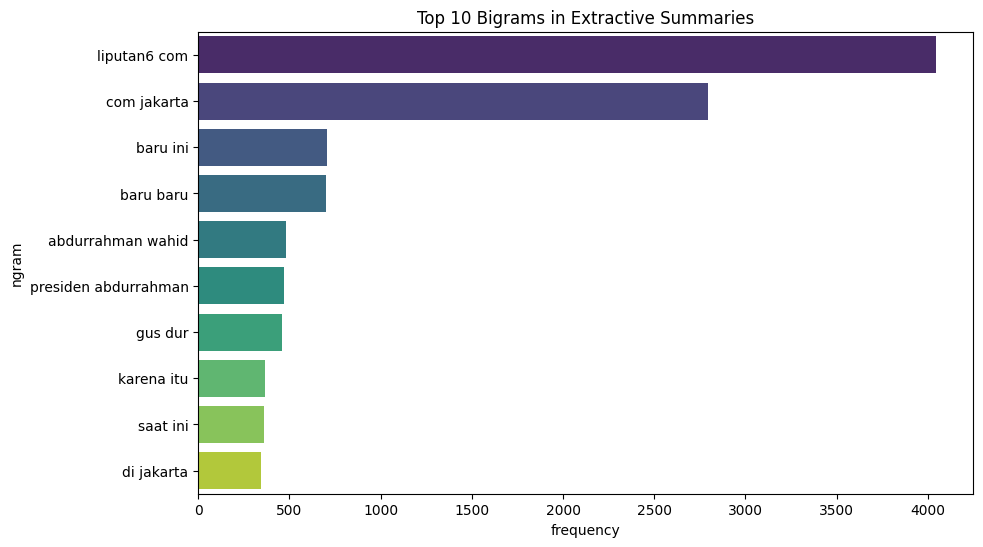

<ipython-input-52-89caef983a49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

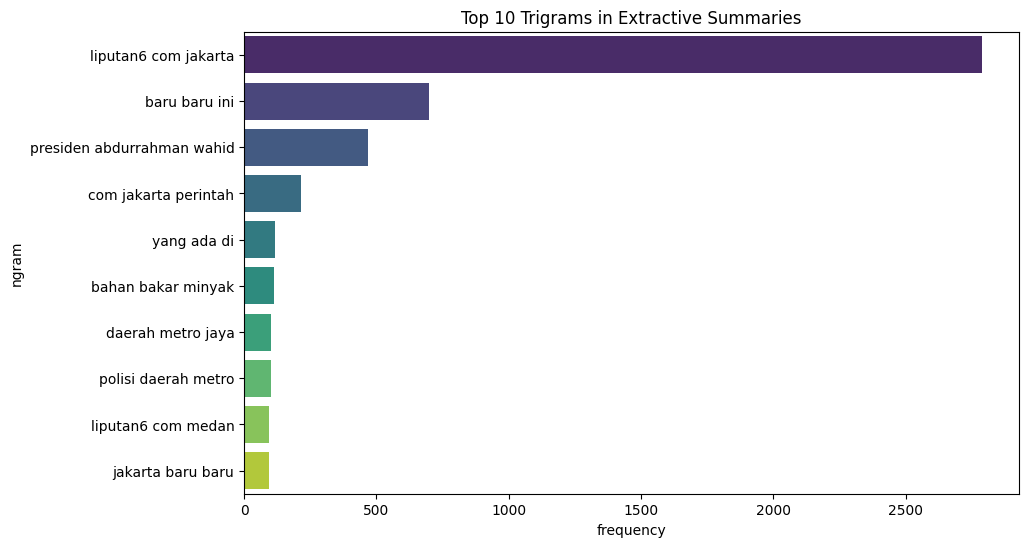

In [52]:
# Function to extract N-grams
def get_ngrams(text, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_vector = vectorizer.fit_transform(text)
    sum_words = ngram_vector.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

# Get unigrams, bigrams, and trigrams for articles, abstractive summaries, and extractive summaries
text_unigrams = get_ngrams(test_df['text'], n=1)
text_bigrams = get_ngrams(test_df['text'], n=2)
text_trigrams = get_ngrams(test_df['text'], n=3)

abstractive_summary_unigrams = get_ngrams(test_df['abstractive_summary'], n=1)
abstractive_summary_bigrams = get_ngrams(test_df['abstractive_summary'], n=2)
abstractive_summary_trigrams = get_ngrams(test_df['abstractive_summary'], n=3)

extractive_summary_unigrams = get_ngrams(test_df['extractive_summary'], n=1)
extractive_summary_bigrams = get_ngrams(test_df['extractive_summary'], n=2)
extractive_summary_trigrams = get_ngrams(test_df['extractive_summary'], n=3)

# Function to visualize top N N-grams
def plot_ngrams(ngrams, title, top_n=10):
    ngrams_df = pd.DataFrame(ngrams, columns=['ngram', 'frequency']).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
    plt.title(title)
    plt.show()

# Visualize top N N-grams for articles, summaries, and extractive summaries
plot_ngrams(text_unigrams, 'Top 10 Unigrams in Articles')
plot_ngrams(text_bigrams, 'Top 10 Bigrams in Articles')
plot_ngrams(text_trigrams, 'Top 10 Trigrams in Articles')

plot_ngrams(abstractive_summary_unigrams, 'Top 10 Unigrams in Abstractive Summaries')
plot_ngrams(abstractive_summary_bigrams, 'Top 10 Bigrams in Abstractive Summaries')
plot_ngrams(abstractive_summary_trigrams, 'Top 10 Trigrams in Abstractive Summaries')

plot_ngrams(extractive_summary_unigrams, 'Top 10 Unigrams in Extractive Summaries')
plot_ngrams(extractive_summary_bigrams, 'Top 10 Bigrams in Extractive Summaries')
plot_ngrams(extractive_summary_trigrams, 'Top 10 Trigrams in Extractive Summaries')


# Summarization Compression Ratio

In [60]:
# Calculate lengths
dev_df['text_length'] = dev_df['text'].str.split().str.len()  # Length of original text
dev_df['a-summary_length'] = dev_df['abstractive_summary'].str.split().str.len()  # Length of abstractive summary
dev_df['e-summary_length'] = dev_df['extractive_summary'].str.split().str.len()  # Length of extractive summary

# Calculate compression ratios
dev_df['abstractive_summary_compression_ratio'] = (dev_df['text_length'] - dev_df['a-summary_length']) / dev_df['text_length']
dev_df['extractive_summary_compression_ratio'] = (dev_df['text_length'] - dev_df['e-summary_length']) / dev_df['text_length']

# Display the first few rows of the DataFrame with compression ratios
print(dev_df[['text_length', 'a-summary_length', 'e-summary_length', 'abstractive_summary_compression_ratio', 'extractive_summary_compression_ratio']].head())


   text_length  a-summary_length  e-summary_length  \
0          138                24                39   
1          171                21                33   
2          166                22                44   
3           98                21                32   
4          188                27                32   

   abstractive_summary_compression_ratio  extractive_summary_compression_ratio  
0                               0.826087                              0.717391  
1                               0.877193                              0.807018  
2                               0.867470                              0.734940  
3                               0.785714                              0.673469  
4                               0.856383                              0.829787  


<ipython-input-61-a0f569396675>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Summary Type', y='Compression Ratio', data=compression_data, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a leng

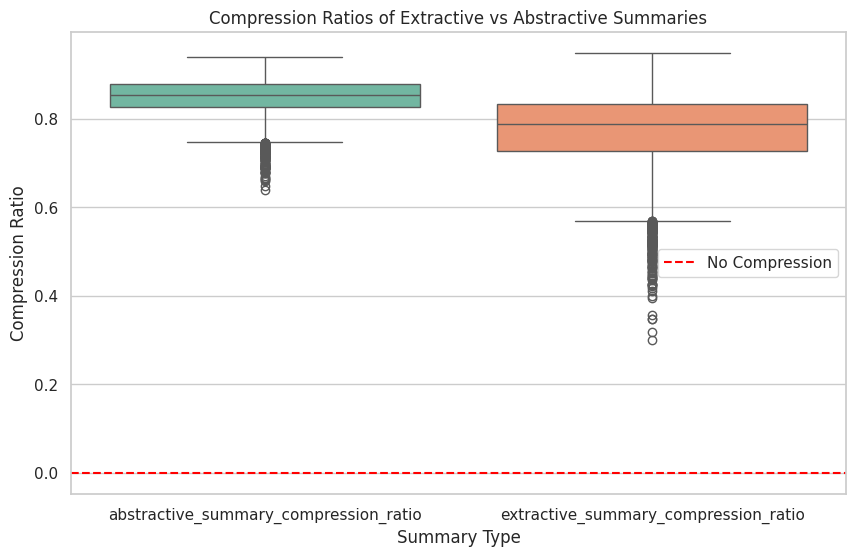

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a DataFrame for plotting
compression_data = dev_df[['abstractive_summary_compression_ratio', 'extractive_summary_compression_ratio']].melt(var_name='Summary Type', value_name='Compression Ratio')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Summary Type', y='Compression Ratio', data=compression_data, palette='Set2')
plt.title('Compression Ratios of Extractive vs Abstractive Summaries')
plt.xlabel('Summary Type')
plt.ylabel('Compression Ratio')
plt.axhline(0, color='red', linestyle='--', label='No Compression')
plt.legend()
plt.show()


# Word + Sentence Overlap

**dev_df**

In [54]:
# Function to calculate word overlap
def calculate_word_overlap(abstractive, extractive):
    abstract_words = set(abstractive.split())
    extractive_words = set(extractive.split())
    overlap = abstract_words.intersection(extractive_words)
    return len(overlap), len(abstract_words), len(extractive_words)

# Function to calculate sentence overlap
def calculate_sentence_overlap(abstractive, extractive):
    abstract_sentences = set(abstractive.split('. '))
    extractive_sentences = set(extractive.split('. '))
    overlap = abstract_sentences.intersection(extractive_sentences)
    return len(overlap), len(abstract_sentences), len(extractive_sentences)

# Create a new DataFrame to store overlap results
overlap_results = []

for index, row in dev_df.iterrows():
    word_overlap_count, total_abstractive_words, total_extractive_words = calculate_word_overlap(row['abstractive_summary'], row['extractive_summary'])
    sentence_overlap_count, total_abstractive_sentences, total_extractive_sentences = calculate_sentence_overlap(row['abstractive_summary'], row['extractive_summary'])

    overlap_results.append({
        'word_overlap_count': word_overlap_count,
        'total_abstractive_words': total_abstractive_words,
        'total_extractive_words': total_extractive_words,
        'sentence_overlap_count': sentence_overlap_count,
        'total_abstractive_sentences': total_abstractive_sentences,
        'total_extractive_sentences': total_extractive_sentences
    })

overlap_dev_df = pd.DataFrame(overlap_results)


In [55]:
# Calculate overlap ratios
overlap_dev_df['word_overlap_ratio'] = overlap_dev_df['word_overlap_count'] / overlap_dev_df['total_abstractive_words']
overlap_dev_df['sentence_overlap_ratio'] = overlap_dev_df['sentence_overlap_count'] / overlap_dev_df['total_abstractive_sentences']

Word Overlap Ratio Statistics:
count    9775.000000
mean        0.677740
std         0.151243
min         0.187500
25%         0.571429
50%         0.680000
75%         0.789474
max         1.000000
Name: word_overlap_ratio, dtype: float64
Sentence Overlap Ratio Statistics:
count    9775.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: sentence_overlap_ratio, dtype: float64


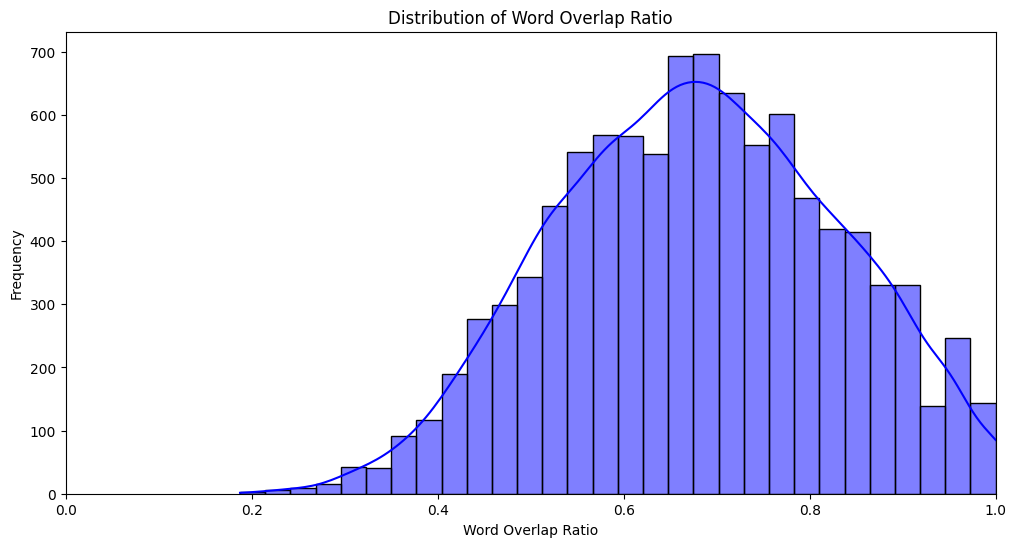

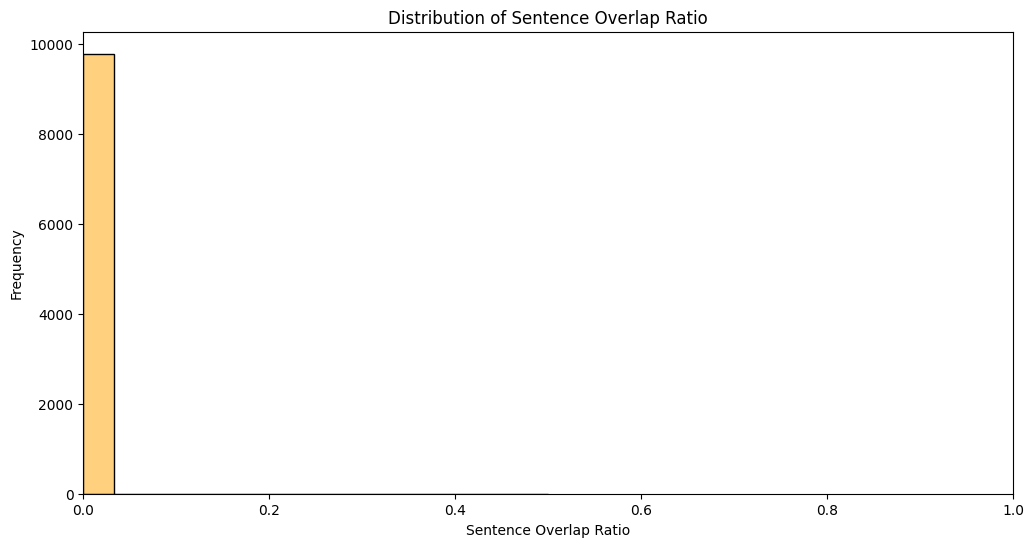

In [56]:
# Check for zero values and outliers in overlap ratios
print("Word Overlap Ratio Statistics:")
print(overlap_dev_df['word_overlap_ratio'].describe())

print("Sentence Overlap Ratio Statistics:")
print(overlap_dev_df['sentence_overlap_ratio'].describe())

# Filter out ratios greater than 1 if any
filtered_overlap_dev_df = overlap_dev_df[
    (overlap_dev_df['word_overlap_ratio'] >= 0) &
    (overlap_dev_df['word_overlap_ratio'] <= 1) &
    (overlap_dev_df['sentence_overlap_ratio'] >= 0) &
    (overlap_dev_df['sentence_overlap_ratio'] <= 1)
]

# Visualize Word Overlap Ratio
plt.figure(figsize=(12, 6))
sns.histplot(filtered_overlap_dev_df['word_overlap_ratio'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Overlap Ratio')
plt.xlabel('Word Overlap Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis
plt.show()

# Visualize Sentence Overlap Ratio
plt.figure(figsize=(12, 6))
sns.histplot(filtered_overlap_dev_df['sentence_overlap_ratio'], bins=30, kde=True, color='orange')
plt.title('Distribution of Sentence Overlap Ratio')
plt.xlabel('Sentence Overlap Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis
plt.show()


**test_df**

In [57]:
# Function to calculate word overlap
def calculate_word_overlap(abstractive, extractive):
    abstract_words = set(abstractive.split())
    extractive_words = set(extractive.split())
    overlap = abstract_words.intersection(extractive_words)
    return len(overlap), len(abstract_words), len(extractive_words)

# Function to calculate sentence overlap
def calculate_sentence_overlap(abstractive, extractive):
    abstract_sentences = set(abstractive.split('. '))
    extractive_sentences = set(extractive.split('. '))
    overlap = abstract_sentences.intersection(extractive_sentences)
    return len(overlap), len(abstract_sentences), len(extractive_sentences)

# Create a new DataFrame to store overlap results
overlap_results = []

for index, row in dev_df.iterrows():
    word_overlap_count, total_abstractive_words, total_extractive_words = calculate_word_overlap(row['abstractive_summary'], row['extractive_summary'])
    sentence_overlap_count, total_abstractive_sentences, total_extractive_sentences = calculate_sentence_overlap(row['abstractive_summary'], row['extractive_summary'])

    overlap_results.append({
        'word_overlap_count': word_overlap_count,
        'total_abstractive_words': total_abstractive_words,
        'total_extractive_words': total_extractive_words,
        'sentence_overlap_count': sentence_overlap_count,
        'total_abstractive_sentences': total_abstractive_sentences,
        'total_extractive_sentences': total_extractive_sentences
    })

overlap_test_df = pd.DataFrame(overlap_results)


In [58]:
# Calculate overlap ratios
overlap_test_df['word_overlap_ratio'] = overlap_test_df['word_overlap_count'] / overlap_test_df['total_abstractive_words']
overlap_test_df['sentence_overlap_ratio'] = overlap_test_df['sentence_overlap_count'] / overlap_test_df['total_abstractive_sentences']

Word Overlap Ratio Statistics:
count    9775.000000
mean        0.677740
std         0.151243
min         0.187500
25%         0.571429
50%         0.680000
75%         0.789474
max         1.000000
Name: word_overlap_ratio, dtype: float64
Sentence Overlap Ratio Statistics:
count    9775.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: sentence_overlap_ratio, dtype: float64


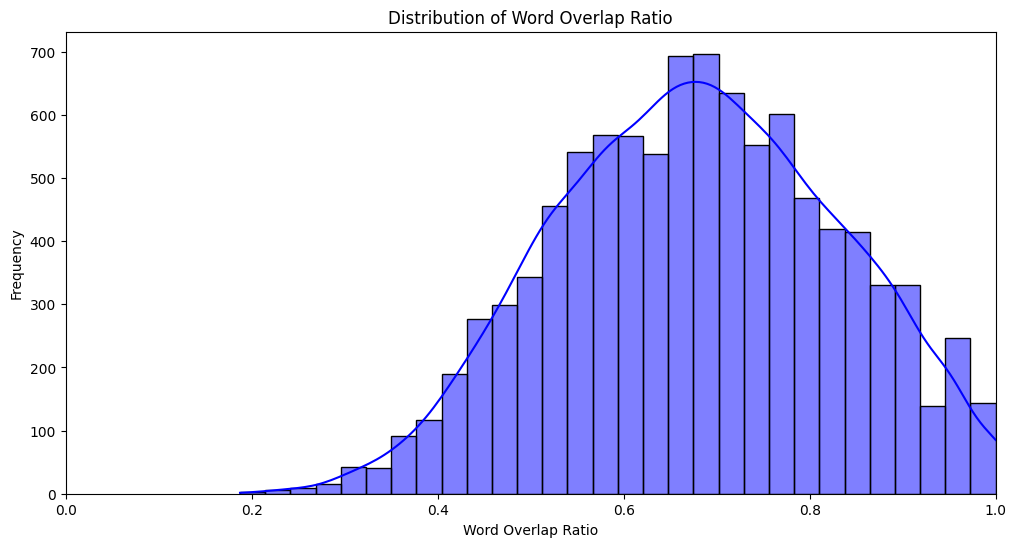

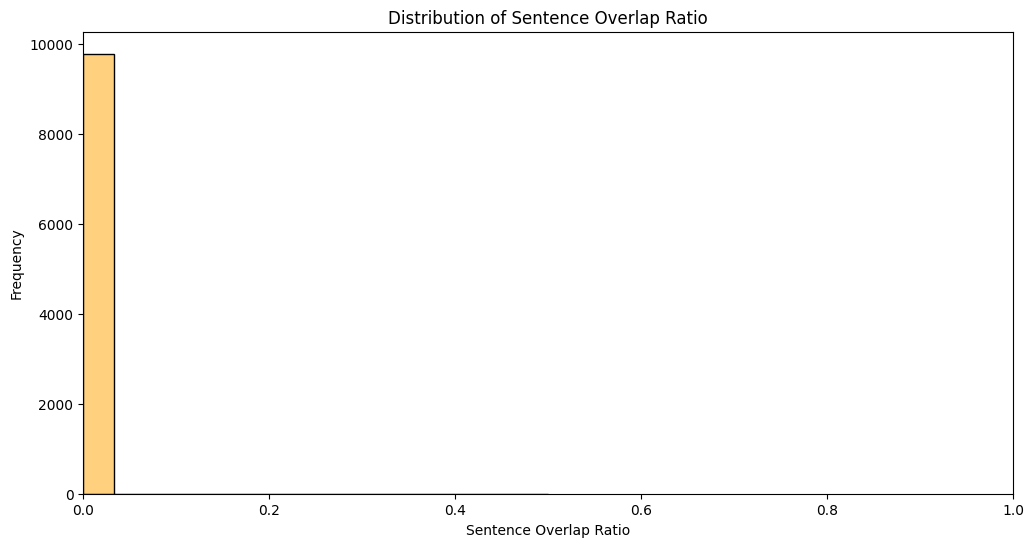

In [59]:
# Check for zero values and outliers in overlap ratios
print("Word Overlap Ratio Statistics:")
print(overlap_test_df['word_overlap_ratio'].describe())

print("Sentence Overlap Ratio Statistics:")
print(overlap_test_df['sentence_overlap_ratio'].describe())

# Filter out ratios greater than 1 if any
filtered_overlap_test_df = overlap_test_df[
    (overlap_test_df['word_overlap_ratio'] >= 0) &
    (overlap_test_df['word_overlap_ratio'] <= 1) &
    (overlap_test_df['sentence_overlap_ratio'] >= 0) &
    (overlap_test_df['sentence_overlap_ratio'] <= 1)
]

# Visualize Word Overlap Ratio
plt.figure(figsize=(12, 6))
sns.histplot(filtered_overlap_test_df['word_overlap_ratio'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Overlap Ratio')
plt.xlabel('Word Overlap Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis
plt.show()

# Visualize Sentence Overlap Ratio
plt.figure(figsize=(12, 6))
sns.histplot(filtered_overlap_test_df['sentence_overlap_ratio'], bins=30, kde=True, color='orange')
plt.title('Distribution of Sentence Overlap Ratio')
plt.xlabel('Sentence Overlap Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis
plt.show()
